In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\91855\Downloads\NewspaperData.csv")
data.head()                   

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
data.shape

(34, 3)

In [4]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [7]:
data.tail()

,Newspaper,daily,sunday
29,San Francisco Chronicle,570.364,704.322
30,St. Louis Post-Dispatch,391.286,585.681
31,St. Paul Pioneer Press,201.860,267.781
32,Tampa Tribune,321.626,408.343
33,Washington Post,838.902,1165.567


In [8]:
data.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

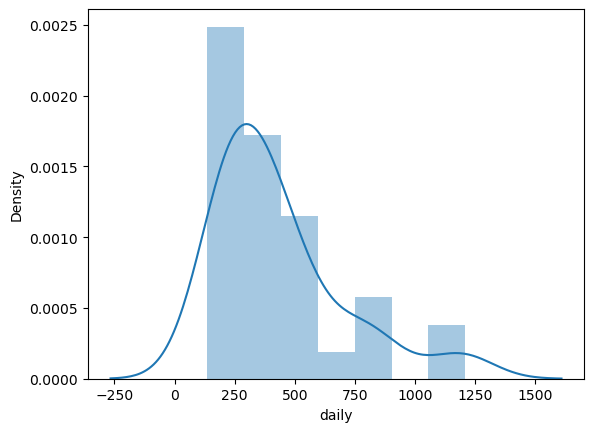

In [9]:
sns.distplot(data['daily'])

<Axes: xlabel='sunday', ylabel='Density'>

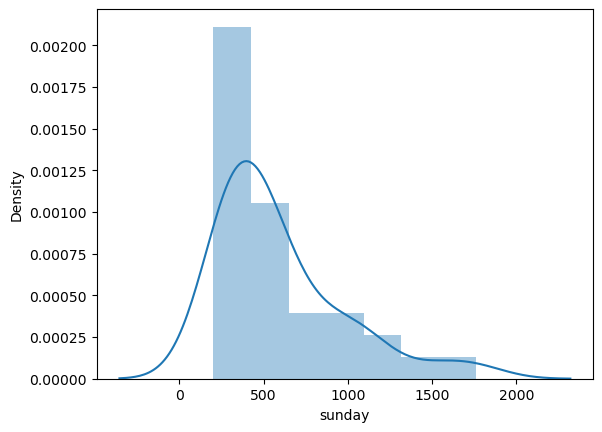

In [10]:
sns.distplot(data['sunday'])

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

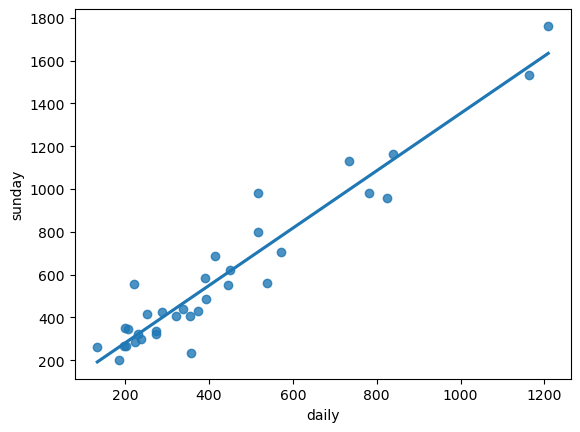

In [12]:
sns.regplot(x="daily" ,y="sunday", data=data,ci=None);

In [27]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [29]:
print(model.tvalues, '\n',  model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [31]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [33]:
daily=300

In [35]:
sunday=1.339715*daily + 13.835630

In [37]:
sunday

415.75012999999996

In [43]:
y=daily+sunday

In [45]:
y

715.7501299999999

In [47]:
sunday+37.35

453.10013

In [51]:
sunday-37.35

378.40012999999993

In [53]:
model.rsquared

0.9180596895873295

In [63]:
newdata=pd.Series([1000,3000])
newdata

0    1000
1    3000
dtype: int64

In [67]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [69]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64

In [73]:
data_pred['sunday']=model.predict(data_pred)

In [77]:
data_pred

,daily,sunday
0,1000,1353.550388
1,3000,4032.979903


In [79]:
from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()
lr.fit(data[['daily']],data['sunday'])

LinearRegression()